<a href="https://colab.research.google.com/github/MfundoMhlanga/classification-predict-streamlit-template/blob/master/Classification_Predict_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='red'>Climate Change Belief Analysis</font>**

© Explore Data Science Academy

Team 13
##**<font color='green'>Introduction: Climate Change Belief</font>**

<p align="justify" > Understanding how the climate is changing is critical so that we can plan for the future. Climate research can help us forecast how much rain will fall next winter or how much sea levels will rise as a result of rising sea temperatures. It's crucial to figure out how people feel about climate change and if they believe it's a real threat.

This classification predict layout is as follows:

1. Introduction
2. Import libraries and load data
3. Exploratory Data Analysis
4. Data pre-processing
5. Building models
6. Use best model on our unseen data
7. Conclusion
8. Submission

##**<font color='cyan'>Problem Statement:</font>**
Faced with the ever changing climate and global changes, we are using tweeter data to determine whether the proportion of people in the tweeter data believe in climate change.

##**<font color='purple'>Task: Classification based on Tweets</font>**
<p align="justify" >To develop a Machine Learning model that can classify whether or not a person believes in climate change based on new tweet data.
As a result, delivering a precise and robust solution to this task provides businesses with access to a large pool of customer sentiment, covering numerous demographic and geographic groups, allowing them to gain new insights and better inform future marketing initiatives.

<div align="center" style="width: 800px; font-size: 100%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/MfundoMhlanga/classification-predict-streamlit-template/master/Screenshot%20(480).png"

Climate Change  Photo by <a href="https://explore-datascience.net"> explore-datascience.net </a> 
</div>


##**<font color='Brown'>Objective: </font>** 
Objectives:

1.   To analyse the tweets of Individual Twitter account in term of Sentiments
2.   Identify individual tweets as news, pro, neutral and anti-climate change 
3.   Calculate the f1 score of the sentiments

# Importing libraries

In this section we are importing all the relavant packages which will be used for analysis and modeling.

In [2]:
!!pip install nlppreprocess

['Requirement already satisfied: nlppreprocess in /usr/local/lib/python3.7/dist-packages (1.0.2)']

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [4]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for data preparation and model building
# Import the scaling module
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
# Import train/test split module

#Modelling 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPClassifier
# NLP Libraries
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer,SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.pipeline import Pipeline
from nltk import pos_tag
from nlppreprocess import NLP
nlp = NLP()
#evaluating the model
from sklearn.metrics import f1_score,confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

#Loading DataSets

 Loading the data to be used to build our classification model.

In [5]:
# Loading in the datasets
df = pd.read_csv("https://raw.githubusercontent.com/MfundoMhlanga/classification-predict-streamlit-template/master/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/MfundoMhlanga/classification-predict-streamlit-template/master/test_with_no_labels.csv")

#pd.set_option('display.max_columns', None)
df1=df.copy()
df_test1=df_test.copy()

In [6]:
df.head(2)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103


In [7]:
df_test.head(2)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326


Data Description

*   Columns sentiment: Sentiment of tweet 
*   message: Tweet body
*   tweetid: Twitter unique id

i.e. We have this features: Sentiments (Target) and Message (feature) including TweetsId










In [8]:
df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Class Description 


*   2 News: the tweet links to factual news about climate change 
*   1 Pro: the tweet supports the belief of man-made climate change 
*   0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
*   -1 Anti: the tweet does not believe in man-made climate change 



 


## **<font color='red'>Working on Imbalanced Datasets</font>**

<a id="three"></a>
# Exploratory Data Analysis


<p align="justify" > This section provides an in depth EDA which allowvus to gain deeper insights into the dimensions and features of our data.

We will take a closer look at our data to check for obvious and hidden underlying clues and relationships that exist within our differrent classes. 

In [9]:
#Checking the shape of the train and test set
#df=df[:10546]
df.shape,df_test.shape

((15819, 3), (10546, 2))

In [10]:
round((df.isnull().sum()/df.shape[0])
      *100,2).astype(str)+ ' %'


sentiment    0.0 %
message      0.0 %
tweetid      0.0 %
dtype: object


No Missing Values in our Dataset i.e. we have 0 null values on our data.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The data types are object and 2 integers (tweetid and Sentiment) but since Sentiments is suppose to be a category, we will change it to catergory type.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


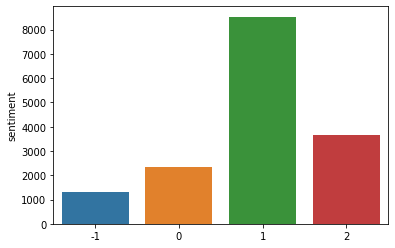

In [12]:
# Visualizing the distribution of the feature to the target
sns.barplot(df['sentiment'].value_counts().index,df['sentiment'].value_counts())

Our datasets has a class imbalance problem, which is a problem in  machine learning classification, this shows that there are a disproportionate ratio of observations in each class. This is can cause problems as most algorithms are designed to maximize accuracy and reduce error.

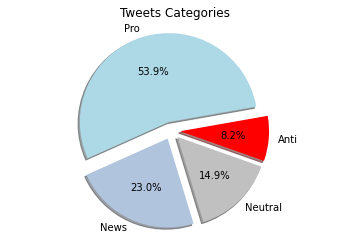

In [13]:
import matplotlib.pyplot as plt
labels = list( { 1: "Pro", 2: "News", 0: "Neutral", -1: "Anti"}.values())

#my_labels = 'Tasks Pending','Tasks Ongoing','Tasks Completed'
my_colors = ['lightblue','lightsteelblue','silver', 'red']
my_explode = tuple([0.1] * len(labels)) #(0, 0.1, 0)
plt.pie(df['sentiment'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=10, shadow = True, colors=my_colors, explode=my_explode)
 

plt.title('Tweets Categories')
plt.axis('equal')
plt.show()


#Extracting Twiter Mentions

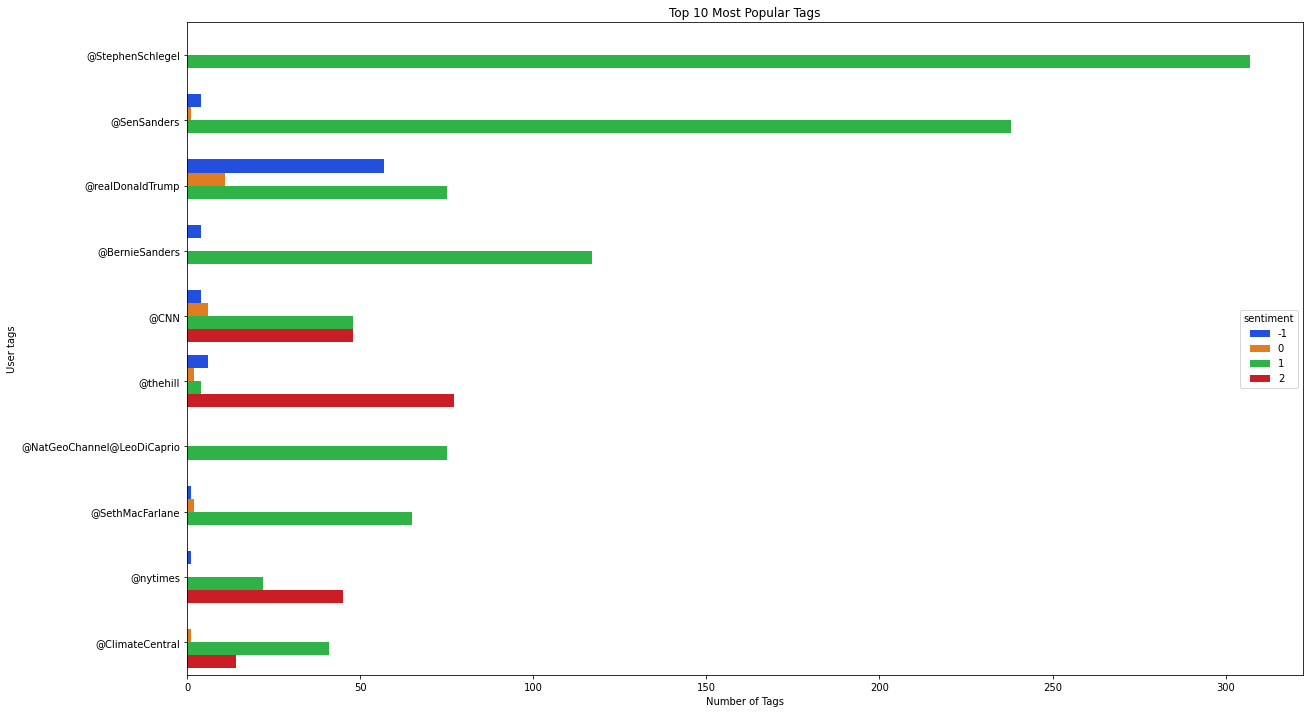

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106
6622,@thehill,89
2521,@NatGeoChannel@LeoDiCaprio,75
5952,@nytimes,68
3296,@SethMacFarlane,68
6785,@washingtonpost,56


In [14]:
df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in df.message]
# Analysis of most popular tags, sorted by populariy
fig, axs = plt.subplots(figsize = (20, 12))
sns.countplot(y="users", hue="sentiment", data=df, palette='bright',
              order=df.users.value_counts().iloc[:10].index, ax=axs) 

plt.ylabel('User tags')
plt.xlabel('Number of Tags')
plt.title('Top 10 Most Popular Tags')
plt.show()
#The total count of messages per user tags
Tags =df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)
Tags.head(10)

<p align="justify" > We are able to notice that certain tags are commonly associated with a specific sentiment. There are some tags which are mojorly strongly associated with one sentiment i.e the Pro Class (the tweet supports the belief of man-made climate change) this includes the former American President Donald Trump. In addition, news platforms such as CNN is in support either as supporting it as a belief of man-made climate change or have positive sentiments concerning Climate Change equally.

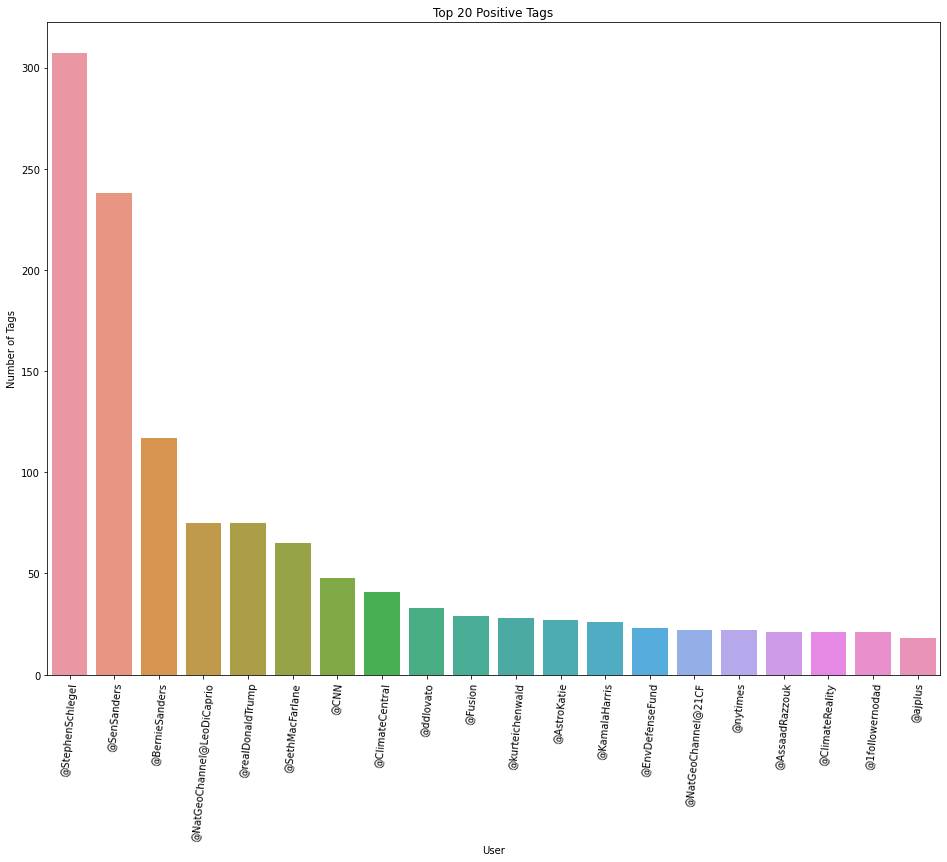

In [15]:
# Analysis of most popular tags, sorted by populariy
fig, axs = plt.subplots(figsize = (16, 12))
sns.countplot(x="users", data=df[df['sentiment'] == 1], 
              order=df[df['sentiment'] == 1].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Positive Tags')

plt.xticks(rotation=85)
plt.show()

Analysing the users;
@StephenSchlegel, @SenSanders, @realDonaldTrump and @BernieSanders have most  tweets associated with Climate change.

In [16]:
df.head(1)

,sentiment,message,tweetid,users
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,@mashable


### Data cleaning



<p align="justify" >  Data cleaning is the process of detecting and correcting corrupt or inaccurate records from the dataset and identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data. We also apply database normalization which is the process of structuring a relational database by a series of normal forms to reduce data redundancy. Applying it will also help improve data integrity as it entails organizing the attributes of a dataset to ensure that their dependencies are properly enforced by database integrity constraints. Stemming and Lemmatization are techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.

In [17]:
# Data cleaning for furthur sentiment analysis

def cleaner(line):
    '''
    For preprocessing the data, we regularize, transform each upper case into lower case, tokenize,
    normalize and remove stopwords. Normalization transforms a token to its root word i.e. 
    These words would be transformed from "love loving loved" to "love love love."
    
    '''

    # Removes RT, url and trailing white spaces
    line = re.sub(r'^RT ','', re.sub(r'https://t.co/\w+', '', line).strip()) 
    emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  # removes emoticons,
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    line = emojis.sub(r'', line)

    # Removes puctuation
    punctuation = re.compile("[.;:!\'’‘“”?,\"()\[\]]")
    tweet = punctuation.sub("", line.lower()) 
    # Removes stopwords
    nlp_for_stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    tweet = nlp_for_stopwords.process(tweet) # This will remove stops words that are not necessary. The idea is to keep words like [is, not, was]
    # https://towardsdatascience.com/why-you-should-avoid-removing-stopwords-aa7a353d2a52

    tweet = tweet.split() 
    pos = pos_tag(tweet)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word, po[0].lower()) 
                      if (po[0].lower() in ['n', 'r', 'v', 'a'] and word[0] != '@') else word for word, po in pos])
    return tweet

In [18]:
# Comparison of Tweets before we apply the function cleaner and after
tweet = df.iloc[7,1]
tweet_clean = cleaner(tweet)
print('BEFORE\n', tweet)
print('AFTER\n', tweet_clean)

BEFORE
 RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦
AFTER
 @makeandmendlife six big thing we can today fight climate change how climate activistã¢â‚¬â¦ hã¢â‚¬â¦


In [19]:
df['clean']  = df['message'].apply(cleaner)
df.head(2)

,sentiment,message,tweetid,users,clean
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,@mashable,polyscimajor epa chief not think carbon dioxid...
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,its not like we lack evidence anthropogenic gl...


In [20]:
df_test['clean']  = df_test['message'].apply(cleaner)
df_test.head(2)

,message,tweetid,clean
0,Europe will now be looking to China to make su...,169760,europe will now look china make sure not alone...
1,Combine this with the polling of staffers re c...,35326,combine with poll staffer re climate change an...


We drop the message column thus we now using the clean data.

In [21]:
df=df.drop('message', axis=1)
df_test=df_test.drop('message', axis=1)
df_test.head(2)

,tweetid,clean
0,169760,europe will now look china make sure not alone...
1,35326,combine with poll staffer re climate change an...


In [22]:
#Positive tweets/sentiment
df[df['sentiment'] == 1].head(10)

,sentiment,tweetid,users,clean
0,1,625221,@mashable,polyscimajor epa chief not think carbon dioxid...
1,1,126103,NaN,its not like we lack evidence anthropogenic gl...
3,1,573736,NaN,#todayinmaker# wire pivotal year in war climat...
4,1,466954,@SoyNovioDeTodas,@soynoviodetodas its and racist sexist climate...
5,1,425577,NaN,worth read whether you not believe in climate ...
6,1,294933,@thenation,@thenation mike penny not believe in global wa...
7,1,992717,@makeandmendlife,@makeandmendlife six big thing we can today fi...
8,1,664510,@AceofSpadesHQ,@aceofspadeshq my yo nephew inconsolable want ...
9,1,260471,@paigetweedy,@paigetweedy no offense… but like… how you jus...
10,1,295793,@StephenSchlegel,@stephenschlegel shes think about how shes go ...


In [23]:
#Negative tweets/sentiment
df[df['sentiment'] ==-1].head(10)

,sentiment,tweetid,users,clean
28,-1,355491,@twitchyteam,sally kohns latest evidence climate change pro...
46,-1,61141,@realDonaldTrump,@realdonaldtrump carbon tax globalist idea ens...
48,-1,719523,@SteveSGoddard,@stevesgoddard we have wind close mph in area ...
56,-1,911385,@MissLizzyNJ,@misslizzynj lmao snowflake complain about sno...
57,-1,768263,@Dawn2334Dawn,@dawndawn one arnold schwarzeneggers vehicle n...
107,-1,798585,@Fruitloopian,@fruitloopian there snow in march we global warm
113,-1,337974,NaN,can someone pls explain its - in march global ...
116,-1,472265,NaN,explain my global warming advocate
121,-1,740194,@TomiLahren,@tomilahren kinda funny professor talk shit tr...
129,-1,473664,@signordal,@signordal new global warming study terrible n...


### Visualisations of Words appearing in our tweets

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

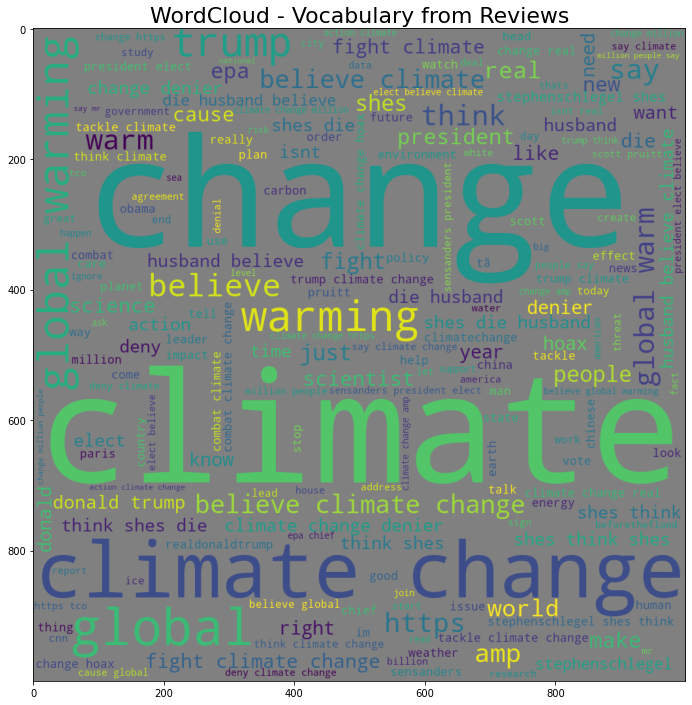

In [24]:
#All Words appearing in our analysis
cv = CountVectorizer(stop_words = 'english',ngram_range = (1,3))
words = cv.fit_transform(df.clean)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'grey', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)


All the different words appearing in our tweets with climate change and global warming being two of the most common words that appear in our dataset.

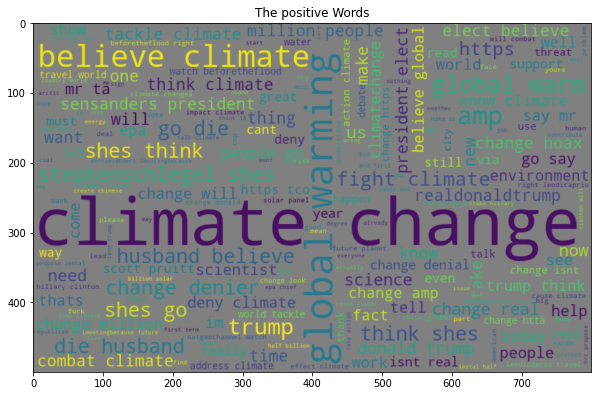

In [25]:
#positive words
positive_words =' '.join([text for text in df['clean'][df['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'grey',width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('The positive Words')
plt.show()

The posiive words that appear from our sentiment.

These positive words includes: believe, travel world, happen etc.

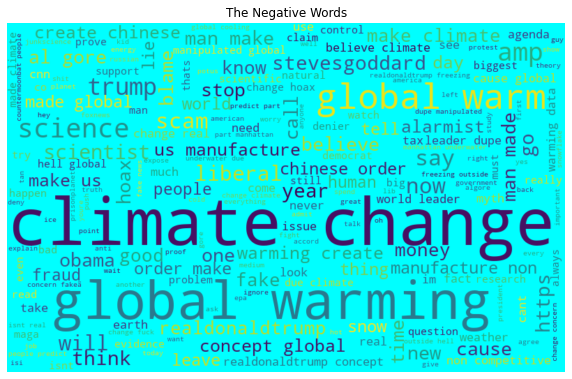

In [26]:
#Negative words
negative_words =' '.join([text for text in df['clean'][df['sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

The negative words that appear from our sentiment.

These words includes:
Stop, Chinese order, fraud, leave, trump, go, global warming, hell, lie etc.

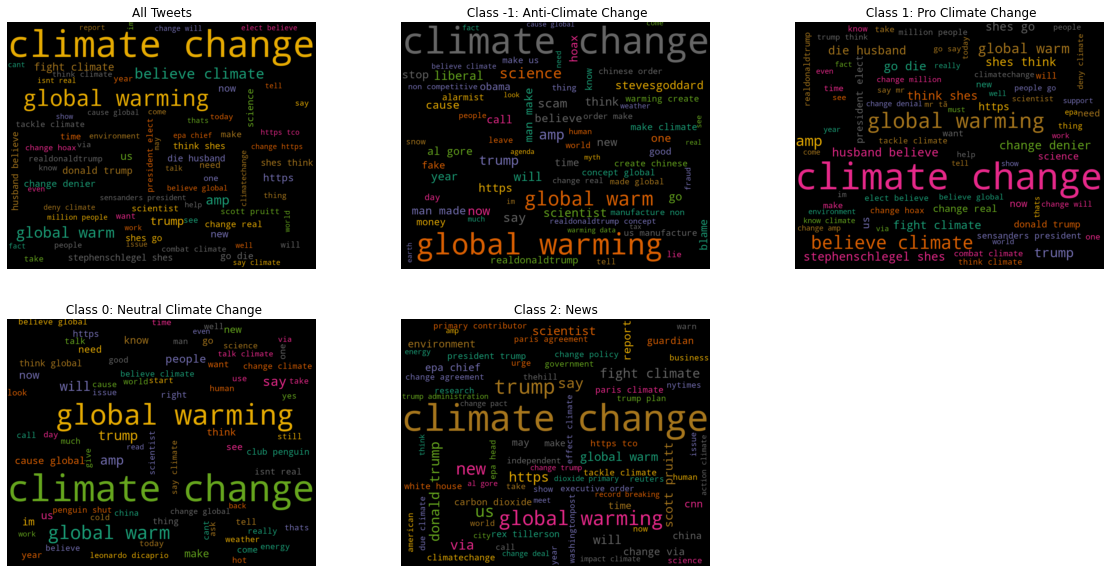

In [27]:
#different Visualisations of all tweets and the different classes in our Analysis

wc = WordCloud(height=800, width=1000, background_color="black",
               colormap="Dark2", max_font_size=150,
               random_state=42,max_words=75)

all_words = ' '.join([text for text in df['clean']])
neg_words =' '.join([text for text in df['clean'][df['sentiment'] == -1]])
pro_words = ' '.join([text for text in df['clean'][df['sentiment'] == 1]])
neutral_words = ' '.join([text for text in df['clean'][df['sentiment'] == 0]])
news = ' '.join([text for text in df['clean'][df['sentiment'] == 2]])

classes =[all_words,neg_words,pro_words,neutral_words,news]

headings=["All Tweets",
          " Class -1: Anti-Climate Change",
         " Class 1: Pro Climate Change",
         " Class 0: Neutral Climate Change",
         "Class 2: News"]
plt.rcParams['figure.figsize'] = [20, 10]

c=1
for sentiment in classes:
    wc.generate(sentiment)
    plt.subplot(2, 3,c)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title((headings[c-1]))
    c+=1

plt.show()

The words believe, trump, climate change and global warming are top of the most common words that appear in our dataset. 

Names of political figures appear commonly in the tweets i.e. including the former president of the United States, Donald Trump and the Administrator of the U.S Environmental Protection Agency (EPA), Scott Pruitt as they are known for their rejection of scientific consensus on climate change. 

##**<font color='purple'>Balancing the Datasets</font>**

<p align="justify" >  The dataset is imbalanced whereby, more than 50% of the observations belong to the Proclass and few observations belong to the Anti class. As the dataset is representative of one class the most than the other classes, it is not usefull for modelling as our model will perform well on the Pro class but poorly for the Anti class and other classes. We will upsample the data to the same size as the ProClass of i.e. to match majority class.

In [28]:
data = df.copy()
data['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

We have a problem i.e. an imbalanced classification problem with only 4 classes we need to distinguish between the classes and balance the classes.

In [29]:
# There are more instances of class 1 than class 2, class 0 and Class -1 in the data frame df.  

# Separate the classes
Cat_News = data[data['sentiment']==2]
cat_Pro = data[data['sentiment']==1]
cat_Neutral = data[data['sentiment']==0]
cat_Anti= data[data['sentiment']==-1]

# Upsample minority class to match the Majority Class
Cat_News = resample(Cat_News,
                             replace=True,  # sample with replacement
                             n_samples=8530,  # to match majority class
                             random_state=300)  # reproducible results
cat_Neutral = resample(cat_Neutral,
                             replace=True,  # sample with replacement
                             n_samples=8530,  # to match majority class
                             random_state=300)  # reproducible results
cat_Anti = resample(cat_Anti,
                             replace=True,  # sample with replacement
                             n_samples=8530,  # to match majority class
                             random_state=300)  # reproducible results

# Combine majority class with upsampled minority class
# Display new class counts

Balanced = pd.concat([cat_Pro, Cat_News, cat_Neutral,cat_Anti])
Balanced['sentiment'].value_counts()

-1    8530
 2    8530
 1    8530
 0    8530
Name: sentiment, dtype: int64

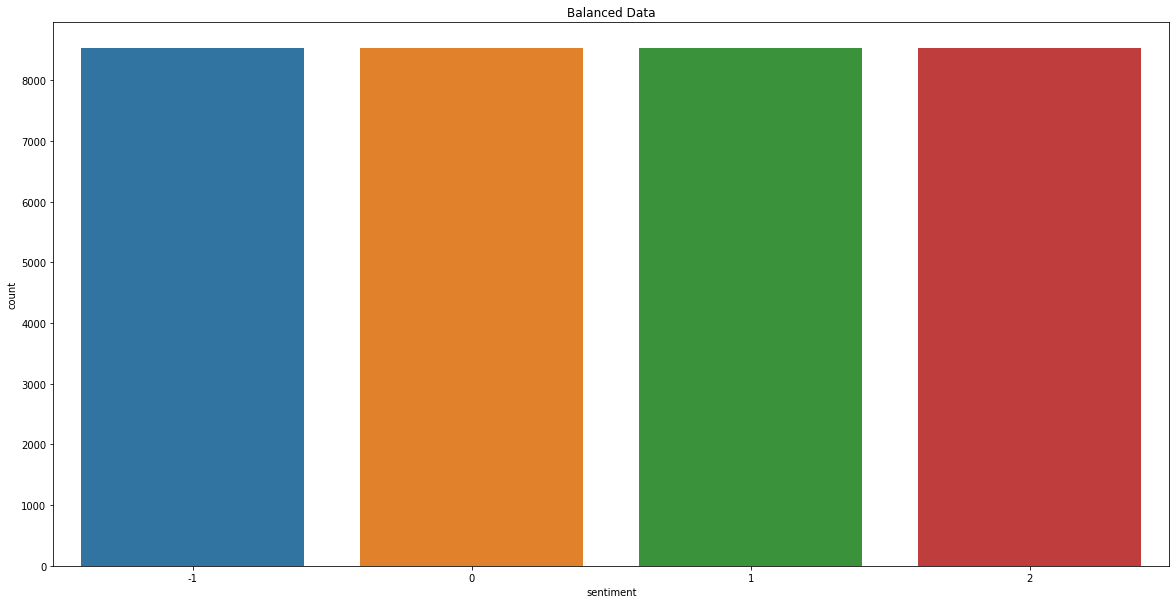

In [30]:
# Checking if data has been well-balanced
sns.countplot(x = Balanced['sentiment'], data = data, palette='tab10')
plt.title('Balanced Data')
plt.show()

# Modelling Imbalanced set
#Splitting the data

Split dataset into Dependent and independent variables. We are to split the dataset into dependent (Y) and independent variables (X).

In [52]:
y=df1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(df1['message'], y, test_size=0.30, stratify=y, random_state=42)

In [44]:
# init stemmer
porter_stemmer=PorterStemmer()

def my_cool_preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

### Applying the Count_vectorizer and TF-IDF Vectorizer


ngram_range : It collets one , one two, one two three words

analyzer : We are using char.

In [53]:
#count_vectorizer = CountVectorizer(stop_words = 'english',  max_df = 0.95)
count_vectorizer = CountVectorizer(lowercase = True, ngram_range=(1, 2), analyzer='word', max_df = 0.70, preprocessor=my_cool_preprocessor) #char_wb, word
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
count_df_test = count_vectorizer.transform(df_test1['message'].values)

Tfidf Vectorizer

In [54]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_test = tfidf_vectorizer.transform(X_test.values)
tfidf_df_test = tfidf_vectorizer.transform(df_test['message'].values)

We did not consider the Tfidf Vectorizer on our final model because it cause our model to perfom low. 

#**<font color='red'>Training and Testing Our data on Imbalanced Dataset</font>**
<p align="justify" >  After data preparation, we are now creating and training the model using Scikit-learn. We import the different classification model from skicit-learn, instantiate the model, and fit the model on the training data. We set the random state for reproducible results.


## The models we will be testing are:

### Linear Support Vector Classifier

<p align="justify" >  The objective of a Linear SVC (Support Vector Classifier) is to fit to the data provided, returning a "best fit" hyperplane that divides, or categorizes, data. After getting the hyperplane,the features are fed to the classifier to see what the "predicted" class is.

###The Support Vector Classifier

<p align="justify" > The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

<p align="justify" > It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM: The algorithm creates a line or a hyperplane which separates the data in


###Logistic regression

<p align="justify" >  Logistic regression is a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.

### Multi Nomial Naive Bayes

<p align="justify" >  Naive Bayes classifier is a general term which refers to conditional independence of each of the features in the model, while Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features

### Ridge Classifier

<p align="justify" >  The Ridge Classifier, based on Ridge regression method, converts the label data into [-1, 1] and solves the problem with regression method. The highest value in prediction is accepted as a target class and for multiclass data muilti-output regression is applied.

### Random Forest Classifier

<p align="justify" >  The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

#Fitting the models

In [55]:
#fitting the models
nb_classifier = MultinomialNB().fit(count_train, y_train)

lr=LogisticRegression(multi_class='multinomial',
                      solver="saga", max_iter = 100,
                      random_state=100).fit(count_train, y_train)#multi_class{‘auto’, ‘ovr’, ‘multinomial’}, LogisticRegression(multi_class='multinomial', solver="saga", random_state=100)#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

rfc = RandomForestClassifier().fit(count_train, y_train)

rrc=RidgeClassifier(alpha=10,
                    solver='cholesky',
                    tol=0.08, 
                    fit_intercept=False).fit(count_train, y_train).fit(count_train, y_train) #(alpha=1.0, solver='auto',tol=0.001)


mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50,30),
                        max_iter = 10,activation = 'tanh',
                        solver = 'adam').fit(count_train, y_train)

svc= SVC(kernel='rbf', 
         C=10.0,
         random_state=1).fit(count_train, y_train)

svcl = svm.LinearSVC().fit(count_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#Evaluating Models i.e Making Predictions on the Test Set

In [56]:
# evaluate ML models

# Make training set predictions for each model
pred_train_nb = nb_classifier.predict(count_train)  
pred_test_nb = nb_classifier.predict(count_test) 


pred_train_rfc = rfc.predict(count_train) 
pred_test_rfc= rfc.predict(count_test)

pred_train_lr = lr.predict(count_train) 
pred_test_lr= lr.predict(count_test)


pred_train_rrc = rrc.predict(count_train) 
pred_test_rrc= rrc.predict(count_test)

pred_train_mlp= mlp_clf.predict(count_train) 
pred_test_mlp= mlp_clf.predict(count_test)

pred_train_svc= svc.predict(count_train) 
pred_test_svc= svc.predict(count_test)

pred_train_svc1= svcl.predict(count_train) 
pred_test_svc1= svcl.predict(count_test)

# Comparing Model Performance: Evaluation Metric
<p align="justify"> The evaluation metrics used to gauge model performance is the weighted F1-score. An F1-score is the harmonic mean between precision and  recall. An F1-Score is calculated for each label that we have for each Sentiment and then their average is weighted by support ( i.e. the number of true instances for each label). It is a value between 0 and 1.

**The formula of the f1-score is as follows**📬

\begin{align}
F1-Score = \frac{2 * (Precision * Recall)}{Precision + Recall}\\
\end{align}


**Where:**

* Precision: Correct positive predictions relative to total positive predictions
* Recall: Correct positive predictions relative to total actual positives

i.e. 
\begin{align}
Precision = \frac{(True  Positive)}{True  Positive + False Positive)}\\
\end{align}


\begin{align}
Recall = \frac{True Positive}{True  Positive + False Negative}\\
\end{align}


### Model Performance Accuracy

In [57]:
# Compare model performance

# Dictionary of results
results_dict = {'Training accuracy_score':
                    {
                        "Naive B": metrics.accuracy_score(y_train ,pred_train_nb), 
                        "FOREST": metrics.accuracy_score(y_train ,pred_train_rfc),
                        "Logistic":metrics.accuracy_score(y_train ,pred_train_lr),
                        "Ridge Classifier": metrics.accuracy_score(y_train ,pred_train_rrc),
                        "MLP Classifier": metrics.accuracy_score(y_train ,pred_train_mlp),
                        "Support Vector Classifier": metrics.accuracy_score(y_train ,pred_train_svc),
                        "Support Vector Linear Classifier": metrics.accuracy_score(y_train ,pred_train_svc1)
                      
                     
                     
                    },
                    'Test accuracy_score':
                    {
                        "Naive B": metrics.accuracy_score(y_test ,pred_test_nb),
                        "FOREST": metrics.accuracy_score(y_test ,pred_test_rfc),
                        "Logistic": metrics.accuracy_score(y_test ,pred_test_lr),
                        "Ridge Classifier": metrics.accuracy_score(y_test ,pred_test_rrc),
                        "MLP Classifier": metrics.accuracy_score(y_test,pred_test_mlp),
                        "Support Vector Classifier": metrics.accuracy_score(y_test ,pred_test_svc),
                        "Support Vector Linear Classifier": metrics.accuracy_score(y_test ,pred_test_svc1)
                    }
                }


### Model Performance F1_score

In [58]:
# Dictionary of results



results_dict_scores = {'F1_score':
                    {
                        "Naive B": f1_score(y_test, pred_test_nb, average="macro"), 
                        "FOREST": f1_score(y_test, pred_test_rfc, average="macro"),
                        "Logistic":f1_score(y_test, pred_test_lr, average="macro"),
                        "Ridge Classifier": f1_score(y_test, pred_test_rrc, average="macro"),
                        "MLP Classifier": f1_score(y_test, pred_test_mlp, average="macro"),
                        "Support Vector Classifier": f1_score(y_test, pred_test_svc, average="macro"),
                        "Support Vector Linear Classifier": f1_score(y_test, pred_test_svc1, average="macro")

                    }
                  
                }

# Results of all the models
The results of the models are summarized and shown with regards to the Training and Testing RMSE.

### Results Based on Accuracy

In [59]:
# Create dataframe from the dictionary of all the accuracy score results


results_df = pd.DataFrame(data=results_dict)
results_df

,Training accuracy_score,Test accuracy_score
Naive B,0.940034,0.705015
FOREST,0.999910,0.715550
Logistic,0.999729,0.749895
Ridge Classifier,0.998194,0.751159
MLP Classifier,0.999910,0.752634
Support Vector Classifier,0.999910,0.747577
Support Vector Linear Classifier,0.999910,0.751159


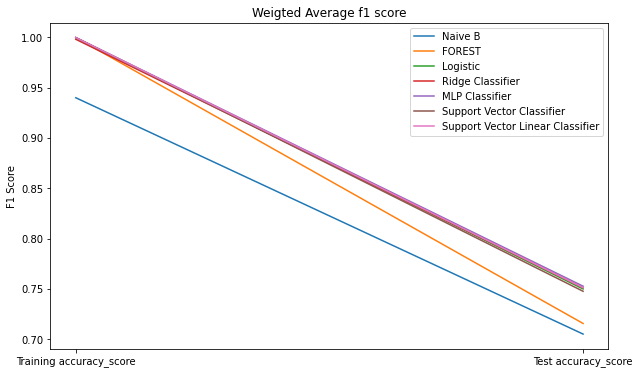

In [61]:
 def all_models_performance(results_df):
    ''' plot the changes in the scores pre and post data transformation.'''
    fig = plt.figure(figsize=(10,6))

    for col in results_df.T.columns:
       plt.plot(results_df.T[col],label=col)
       plt.legend()
      
    plt.title('Weigted Average f1 score')
    plt.ylabel('F1 Score')
  
    return fig

_ = all_models_performance(results_df)

Test accuracy vs Train Accuracy for each model clearly illustratated, i.e the testing accuracy of the model ranging around 94-99% and the traing around 70-75%.

### Results Based on F1_score

In [60]:
results_f1score = pd.DataFrame(data=results_dict_scores)
results_f1score

,F1_score
FOREST,0.548027
Logistic,0.655759
MLP Classifier,0.664125
Naive B,0.504983
Ridge Classifier,0.652853
Support Vector Classifier,0.642519
Support Vector Linear Classifier,0.663801


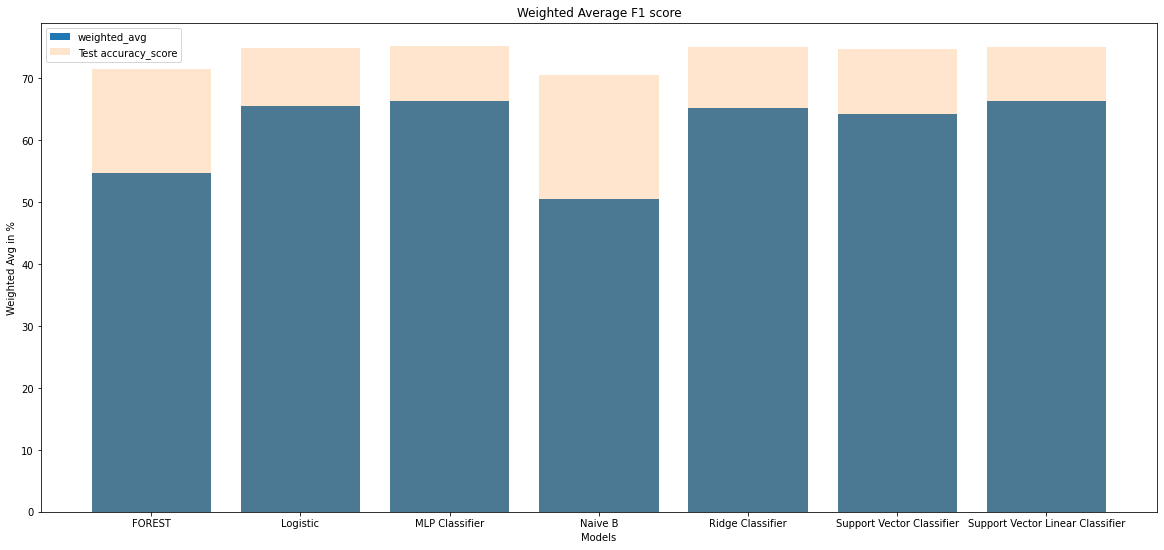

In [62]:
x = list(results_f1score.index)
x1 = list(results_df.index)
height = [i*100 for i in results_f1score.F1_score]
plt.figure(figsize=(20,9))
plt.bar(x,height,label='weighted_avg')
plt.bar(x1,height=[i*100 for i in results_df['Test accuracy_score']], alpha=0.2,label='Test accuracy_score')
plt.title('Weighted Average F1 score')
plt.xlabel('Models')
plt.ylabel('Weighted Avg in %')
plt.legend()
plt.show()

### Submission on Imbalanced dataset

In [55]:
pred = svc.predict(count_df_test)
sub = pd.DataFrame({"tweetid":df_test['tweetid'], 'sentiment': pred})
sub = sub.set_index('tweetid')
sub.to_csv('submission.csv',index=True)
sub.head()

,sentiment
tweetid,
169760,2
35326,1
224985,1
476263,1
872928,0


#**<font color='purple'>Training and Testing Our data on Balanced Dataset</font>**


###Class Balanced Dataset Training and Testing

In [56]:
#Working with balanced data

# Defining the features as well as the label
X_new= Balanced['clean']
#X_new = X_new.apply(cleaner)
X_new=Balanced['clean']
y_new = Balanced['sentiment']

#Train and Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y_new, test_size=0.30, stratify=y_new,random_state=42)

count_vectorizer = CountVectorizer(lowercase = True, ngram_range=(1, 2), analyzer='word', max_df = 0.70, preprocessor=my_cool_preprocessor)#(lowercase = True, ngram_range=(1, 2), analyzer='word')
count_train1 = count_vectorizer.fit_transform(X_train1.values)
count_test1 = count_vectorizer.transform(X_test1.values)
count_df_test1 = count_vectorizer.transform(df_test['clean'].values)

Classifiers = [MultinomialNB(),RandomForestClassifier(), LogisticRegression(multi_class='ovr', solver="saga", random_state=100), RidgeClassifier(alpha=1.0, solver='auto',tol=0.001), 
               MLPClassifier(hidden_layer_sizes=(100,50,30),
                              max_iter = 10, activation = 'tanh',
                           solver = 'adam'), SVC(kernel = 'linear'), SVC(kernel = 'rbf')]

for n in range(0, len(Classifiers)):
    text_clf = Pipeline([('clf', Classifiers[n])])
    text_clf.fit(count_train1, y_train1)  
    predictions = text_clf.predict(count_test1)
    
    
    print(Classifiers[n])
    a= metrics.confusion_matrix(y_test1,predictions)
    print(metrics.confusion_matrix(y_test1,predictions))
    print(metrics.classification_report(y_test1,predictions))
    b=metrics.f1_score(y_test1,predictions, average = 'macro')
    print('F1_score: ',round(metrics.f1_score(y_test1,predictions, average = 'macro'),3))
    print('-------------------------------------------------------')

MultinomialNB()
[[2527    6    8   18]
 [  94 2342   70   53]
 [ 186  235 1825  313]
 [  26   25   81 2427]]
              precision    recall  f1-score   support

          -1       0.89      0.99      0.94      2559
           0       0.90      0.92      0.91      2559
           1       0.92      0.71      0.80      2559
           2       0.86      0.95      0.90      2559

    accuracy                           0.89     10236
   macro avg       0.89      0.89      0.89     10236
weighted avg       0.89      0.89      0.89     10236

F1_score:  0.888
-------------------------------------------------------
RandomForestClassifier()
[[2540   11    8    0]
 [  27 2458   66    8]
 [  46  275 1946  292]
 [  10   53   87 2409]]
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2559
           0       0.88      0.96      0.92      2559
           1       0.92      0.76      0.83      2559
           2       0.89      0.94      0.91     

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='ovr', random_state=100, solver='saga')
[[2548   10    1    0]
 [  33 2451   58   17]
 [  59  227 2023  250]
 [   1   36   69 2453]]
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      2559
           0       0.90      0.96      0.93      2559
           1       0.94      0.79      0.86      2559
           2       0.90      0.96      0.93      2559

    accuracy                           0.93     10236
   macro avg       0.93      0.93      0.92     10236
weighted avg       0.93      0.93      0.92     10236

F1_score:  0.924
-------------------------------------------------------
RidgeClassifier()
[[2545   11    1    2]
 [  30 2454   60   15]
 [  42  215 2033  269]
 [   0   36   89 2434]]
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2559
           0       0.90      0.96      0.93      2559
           1       0.93      0.79      0.86      2559


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50, 30), max_iter=10)
[[2545   13    1    0]
 [  29 2430   90   10]
 [  52  165 2172  170]
 [  13   29  105 2412]]
              precision    recall  f1-score   support

          -1       0.96      0.99      0.98      2559
           0       0.92      0.95      0.94      2559
           1       0.92      0.85      0.88      2559
           2       0.93      0.94      0.94      2559

    accuracy                           0.93     10236
   macro avg       0.93      0.93      0.93     10236
weighted avg       0.93      0.93      0.93     10236

F1_score:  0.933
-------------------------------------------------------
SVC(kernel='linear')
[[2539   14    6    0]
 [  24 2456   68   11]
 [  62  241 2033  223]
 [   4   48   86 2421]]
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      2559
           0       0.89      0.96      0.92      2559
           1       0.93      0.79      0.8

#**<font color='green'>Final Model Selected From Both Imbalanced and Balanced Data Set</font>**

SVC

In [ ]:
#svc = SVC(kernel='linear', gamma='auto', coef0=0.0000001, tol=0.0000002)   #,random_state=78)#{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svc1= SVC(kernel='linear', C=10.0, random_state=1)
svc1.fit(count_train1, y_train1)
sv_pred1 = svc1.predict(count_test1)
print(metrics.accuracy_score(y_test1 ,sv_pred1))
print(f1_score(y_test1, sv_pred1, average="macro"))

#**<font color='green'>The Chosen Model Summary⏰</font>**


<p align="justify" > Based on the results of the F1_score on both the Imbalanced and Balanced datasets, We have Chosen the Linear Support Vector Machine as Our Best Model with regards to this datasets. 

The Best perfoming models is:

*  Linear SVC()


The models that we have trained thus far, The Linear SVC is currently outperforming all the other models that have been trained and testing on the same data. 

### Submission

In [ ]:
#pred = svc.predict(count_df_test)
pred = svc1.predict(count_df_test1)

In [ ]:
sub = pd.DataFrame({"tweetid":df_test['tweetid'], 'sentiment': pred})
sub = sub.set_index('tweetid')
sub.to_csv('submission.csv',index=True)
sub.head()

## To Comet:

In [ ]:
To Comet
# For each model
for a, b in class_dict.items():
    # Record Metrics
    y_pred = b[0].predict(X_test)
    f1 = f1_score(y_test,y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    metrics = {'f1':f1,
              'recall':recall,
              'precision':precision}
    # Enter paramerters
    params = {"random_state":rs,
              "model_type":"",
              "scaler":"",
              "param_grid":"",
              "stratify":""}
    # Enter
    metrics = {"f1":f1,
               "precision":precision,
               "recall":recall}
    experiment.log_metric(metrics)
    experiment.log_parameter(params)
experiment.end()

##**<font color='green'>Conclusion: </font>**

<p align="justify" > The best performing model in this study was the Linear Support Vector Machine, with an F1-score of 66% on the imbalanced set and 92% on the balanced set. Balancing the data improved the F1-score. An alternative approach would be to consider other models i.e. deep Neural Networks models  because these are models that perform better with unbalanced data, and identify patterns other models could not comprehend. The insights gained from the EDA as well as model evaluation was useful and could be used in providing stakeholders that are interested in climate change a chance to understand the distribution of sentiments and more informations associated with this.

Furthermore, research shows that machine learning methods, such as the SVM  have the highest accuracy using twitter data and can be regarded as the baseline learning methods. We also studied the effects of various features on the classifiers. Thus, we can conclude that the more we introduce techniques to clean the data, the more accurate the results.

##**<font color='green'>Recommendations: </font>**

<p align="justify" > Parameter tuning: The objective of parameter tuning is to find the optimum value for each parameter to improve the accuracy of the model. Tuning the these parameters requires a good understanding of these meaning and their individual impact on model which can be unpacked through a thorough EDA.